# Data Science Final Project

### Data: https://www.kaggle.com/datasets/kazanova/sentiment140 

In [1]:
!pip install tensorflow
!pip install sklearn
!pip install nltk
!pip install vaderSentiment
!pip install wordcloud

     |██████████████████▋             | 297.9 MB 148.5 MB/s eta 0:00:02

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     |████████████████████████████████| 57 kB 75 kB/s s eta 0:00:01
     |████████████████████████████████| 42 kB 35 kB/s s eta 0:00:01
     |████████████████████████████████| 126 kB 74.5 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 304 kB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 78.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 179 kB/s  eta 0:00:01
     |████████████████████████████████| 14.5 MB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 35.6 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=75fbda510e131d2a49a3581af224ba230faa2da2fac8116b46e981be26ff2d77
  Stored in directory: /home/u

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

2022-05-30 11:38:52.886920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 11:38:52.886975: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df = pd.read_csv('training.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df = df.drop(['sentiment','id', 'date', 'query', 'user_id'], axis=1)
df.head()

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


## Text processing

In [6]:
# stemmer = SnowballStemmer('english')

# text_cleaning = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [7]:
# def preprocess(text, stem=False):
#   text = re.sub(text_cleaning, ' ', str(text)).strip()
#   tokens = []
#   for token in text.split():
#     tokens.append(token)
#   return " ".join(tokens)

In [8]:
# df.text = df.text.apply(lambda x: preprocess(x))

## Sentiment analysis

In [5]:
#Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis function
def calculate_sentiment_scores(sentence):
    sntmnt = analyzer.polarity_scores(sentence)['compound']
    return(sntmnt)

In [6]:
eng_snt_score =  []

# For loop to calculate each tweet's sentiment analysis
for tweet in df.text.to_list():
    snts_score = calculate_sentiment_scores(tweet)
    eng_snt_score.append(snts_score)

In [7]:
# Array of sentiment score
df['sentiment'] = np.array(eng_snt_score)
df.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",-0.0173
1,is upset that he can't update his Facebook by ...,-0.7500
2,@Kenichan I dived many times for the ball. Man...,0.4939
3,my whole body feels itchy and like its on fire,-0.2500
4,"@nationwideclass no, it's not behaving at all....",-0.4939


In [8]:
# Threshold of sentiment score and classification
vader_sentiment = [ ]

def sent_vader():
    i = 0
    while(i<len(df)):
        if ((df.iloc[i]['sentiment'] >= 0.05)): #positive
            vader_sentiment.append('Positive')
            i = i+1
        elif ((df.iloc[i]['sentiment'] <= - 0.05)): #negative
            vader_sentiment.append('Negative')
            i = i+1
        elif ((df.iloc[i]['sentiment'] > -0.05) & (df.iloc[i]['sentiment'] < 0.05)):
            vader_sentiment.append('Neutral')
            i = i+1
            
        
sent_vader()

In [9]:
# Classification tweets
df['vader_sentiment_labels'] = vader_sentiment

In [10]:
df = df[df.vader_sentiment_labels != 'Neutral']

In [11]:
df.head(25)

,text,sentiment,vader_sentiment_labels
1,is upset that he can't update his Facebook by ...,-0.7500,Negative
2,@Kenichan I dived many times for the ball. Man...,0.4939,Positive
3,my whole body feels itchy and like its on fire,-0.2500,Negative
4,"@nationwideclass no, it's not behaving at all....",-0.4939,Negative
6,Need a hug,0.4767,Positive
7,@LOLTrish hey long time no see! Yes.. Rains a...,0.6208,Positive
12,@caregiving I couldn't bear to watch it. And ...,-0.5994,Negative
13,"@octolinz16 It it counts, idk why I did either...",-0.1027,Negative
14,"@smarrison i would've been the first, but i di...",0.3724,Positive
15,@iamjazzyfizzle I wish I got to watch it with ...,0.4545,Positive


## Visualizations

In [12]:
df.vader_sentiment_labels.value_counts()

Positive    750244
Negative    417648
Name: vader_sentiment_labels, dtype: int64

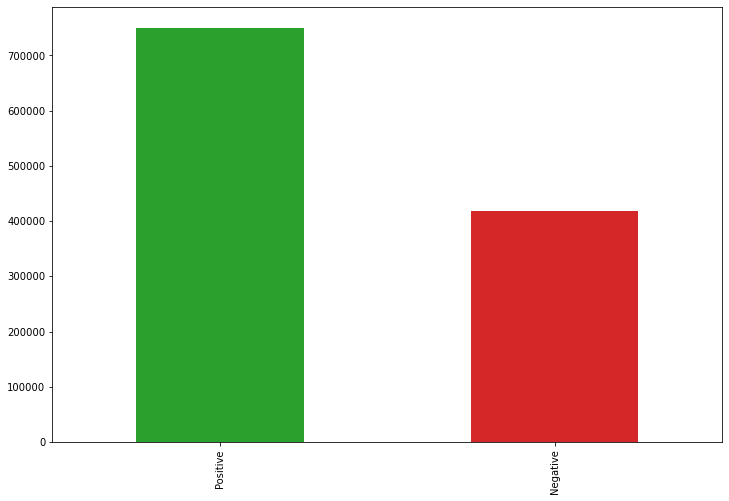

In [13]:
# Plotting the results of the classification
colors = ['#2ca02c', '#d62728'] #'#ff7f0e'
df['vader_sentiment_labels'].value_counts().plot(kind='bar',figsize=(12,8), color=colors);

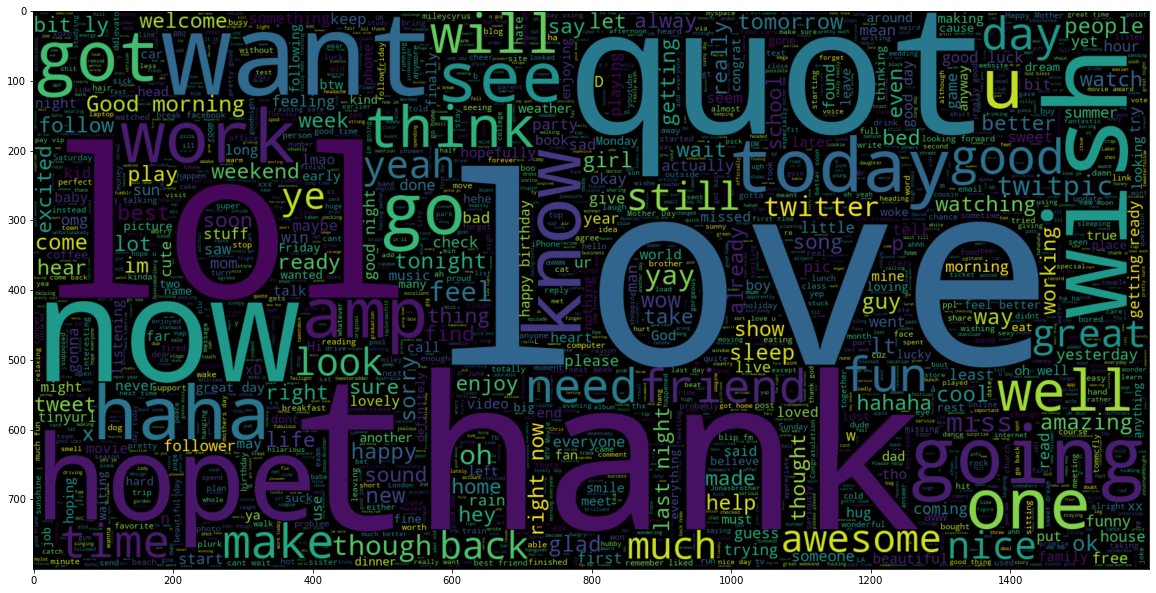

In [14]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.vader_sentiment_labels == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

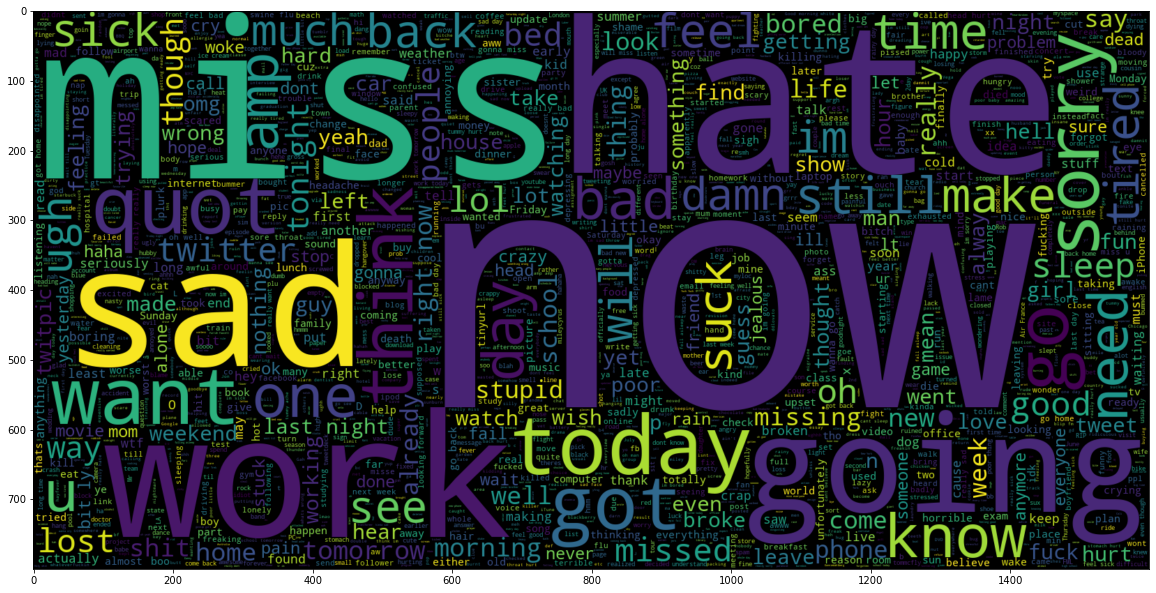

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.vader_sentiment_labels == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Neural Network

In [16]:
train_size = 0.8
MAX_NB_WORDS = 100000
max_seq_len = 30

In [17]:
train_data, test_data = train_test_split(df, test_size=1-train_size,
                                         random_state=7) 
print("Train size:", len(train_data))
print("Test size", len(test_data))

Train size: 934313
Test size 233579


In [21]:
train_data.head(10)

,text,sentiment,vader_sentiment_labels
986850,@deconstructo lucky you didnt mistype that &qu...,0.7003,Positive
1289735,"http://twitpic.com/6gjhk Stuntin' is a habit, ...",0.5229,Positive
1191449,@Ms_AliceV it's going to be a good time. It al...,0.4404,Positive
1244628,My new lighter is pretty.,0.4939,Positive
1166577,Have my hands full with 10 dogs in the house. ...,0.5295,Positive
1101618,"@designmeme Hey, still interested in reading t...",0.4019,Positive
263793,@mitaliperkins I don't usually sneer like that,-0.2755,Negative
727997,"Oh crap, over-excitedness is setting in again....",-0.5859,Negative
1218284,shares http://tinyurl.com/l5mm2c official trai...,0.2960,Positive
672064,@CINTAAMONYET Oh Isrien. I hope it does. love ...,0.7964,Positive


In [22]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 471431


In [23]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = max_seq_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = max_seq_len)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (934313, 30)
Testing X Shape: (233579, 30)


In [24]:
labels = train_data.vader_sentiment_labels.unique().tolist()

In [25]:
encoder = LabelEncoder()
encoder.fit(train_data.vader_sentiment_labels.to_list())

y_train = encoder.transform(train_data.vader_sentiment_labels.to_list())
y_test = encoder.transform(test_data.vader_sentiment_labels.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (934313, 1)
y_test shape: (233579, 1)


In [27]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [26]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [27]:
embeddings_index = {}
#f=open("glove.6B.300d.txt","r",encoding='utf-8')
f = open(GLOVE_EMB,"r",encoding='utf-8')
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [32]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [33]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_seq_len,
                                          trainable=False)

In [34]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
# This is the architecture of my nn
sequence_input = Input(shape=(max_seq_len,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [37]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
913/913 [==============================] - 150s 160ms/step - loss: 0.3140 - accuracy: 0.8616 - val_loss: 0.2206 - val_accuracy: 0.9109 - lr: 0.0010
Epoch 2/10
913/913 [==============================] - 143s 157ms/step - loss: 0.2277 - accuracy: 0.9063 - val_loss: 0.1855 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 3/10
913/913 [==============================] - 143s 156ms/step - loss: 0.1996 - accuracy: 0.9193 - val_loss: 0.1681 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 4/10
913/913 [==============================] - 143s 156ms/step - loss: 0.1844 - accuracy: 0.9263 - val_loss: 0.1566 - val_accuracy: 0.9402 - lr: 0.0010
Epoch 5/10
913/913 [==============================] - 143s 156ms/step - loss: 0.1736 - accuracy: 0.9314 - val_loss: 0.1494 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 6/10
913/913 [==============================] - 142s 156ms/step - loss: 0.1659 - accuracy: 0.9349 - val_loss: 0.1434 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 7/10
913/913 [==========================

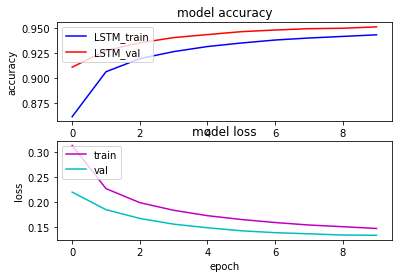

In [38]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')